In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

filename = "basic_features_df.csv"
df=pd.read_csv(filename)
df.head()
train, test = train_test_split(df, test_size=0.2)

0.6363636363636364


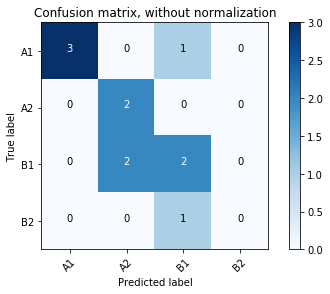

In [113]:

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

feature_list = ["average_sentence_length", "average_syllable_word"]


clf = DecisionTreeClassifier(random_state=0)
clf.fit(train[feature_list], train["Level"])
print(clf.score(test[feature_list], test["Level"]))
level_pred = clf.predict(test[feature_list])
cnf_matrix = confusion_matrix(test["Level"], level_pred)
class_names = ["A1", "A2", "B1", "B2"]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')


In [109]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')